<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Univariate Analysis</h1>
    Copyright Machine Learning Plus
</div>

Univariate analysis is the most basic and simplest form of analyzing the data. “Uni” means “one” and "variate" means variable, Hence it's the analysis of only 1 variable. 

The main goal of univariate analysis is to summarizes that data and finds patterns in the data.

## Items:
- Measure of Central Tendency
- Measure of Dispersion

#### Import the Wine Quality Data

In [7]:
# import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../Datasets/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Measure of Central Tendency</h2>
</div>

Central tendency refers to the center or distribution of a particular feature. Basically it gives an idea about the center of the feature. 

There are various measures of central tendency. The 3 most important measures are: 

- Mean
- Median
- Mode

### Mean

It's the average value of the feature. 

$$\bar{X} = \frac{\sum_{i=1}^{n} x_{i}}{n}$$

Let's compute the mean value of 'fixed acidity' column of the dataset. 

In [9]:
# calculate mean from scratch
sum_values = df['fixed acidity'].sum()
n_values = df['fixed acidity'].shape[0]

mean_value = sum_values/n_values
print("Mean : ", mean_value)

Mean :  8.31963727329581


In [10]:
# calculate mean using mean() function from pandas

mean_value = df['fixed acidity'].mean()
print("Mean : ", mean_value)

Mean :  8.31963727329581


In [11]:
# calculate mean using mean() function from numpy

mean_value = np.mean(df['fixed acidity'])
print("Mean : ", mean_value)

Mean :  8.31963727329581


### Median

It's the middle value in distribution when the values are arranged in ascending or descending order.

Let's compute the median value of 'fixed acidity' column of the dataset. 

In [12]:
# calculate median from scratch
ordered_values = df['fixed acidity'].sort_values().reset_index(drop = True)
n_values = df['fixed acidity'].shape[0]

if n_values % 2 == 0:
    median1 = ordered_values[n_values//2]
    median2 = ordered_values[n_values//2 - 1]
    median_value = (median1 + median2)/2
else:
    median_value = ordered_values[n_values//2]

print("Median : ", median_value)

Median :  7.9


In [13]:
n_values//2

799

In [14]:
8/2, 8//2

(4.0, 4)

In [15]:
9/2, 11//2

(4.5, 5)

In [16]:
# calculate median using median() function from pandas

median_value = df['fixed acidity'].median()
print("Median : ", median_value)

Median :  7.9


In [17]:
# calculate median using median() function from numpy

median_value = np.median(df['fixed acidity'])
print("Median : ", median_value)

Median :  7.9


### Mode

It's the most occurring value in a feature.

Let's compute the mode value of 'fixed acidity' column of the dataset. 

In [18]:
# calculate the count of occurance for every value
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [19]:
# calculate mode from scratch

mode_value = df['quality'].value_counts().to_list()[0]
print("Mode : ", mode_value)

Mode :  681


In [20]:
# calculate mode using mode() function from pandas

mode_value = df['quality'].mode()
print("Mode : ", mode_value)

Mode :  0    5
Name: quality, dtype: int64


In [22]:
# calculate mode using mode() function from scipy.stats
from scipy import stats

mode_value = stats.mode(df['quality'])
print("Mode : ", mode_value)

Mode :  ModeResult(mode=np.int64(5), count=np.int64(681))


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Measure of Dispersion</h2>
</div>

Dispersion refers to how the data is spread. Basically it gives an idea about the spread of values in the feature. 

There are various measures of dispersion. The 4 most important measures are: 

- Range
- Quartiles, IQR
- Variance
- Standard Deviation
- Mean Absolute Deviation (MAD)



### Range

A range is the most basic measure of dispersion. It is the difference between maximum and minimum value of the feature


$$Range = Xmax – Xmin$$

In [13]:
# range of fixed acidity

range_value = df['fixed acidity'].max() -  df['fixed acidity'].min()
print("Min Value: ", df['fixed acidity'].max())
print("Max Value: ", df['fixed acidity'].min())
print("Range Value: ", range_value)

Min Value:  15.9
Max Value:  4.6
Range Value:  11.3


### IQR

IQR is the difference between 3rd quartile and 1st quartile values of the feature


$$IQR = Q_3 – Q_1$$

In [14]:
# IQR of fixed acidity

q1 = np.percentile(df['fixed acidity'], 25, interpolation = 'midpoint') 
q3 = np.percentile(df['fixed acidity'], 75, interpolation = 'midpoint') 
IQR = q3 - q1 
print("Q1 Value: ", q1)
print("Q3 Value: ", q3)
print("IQR Value: ", IQR)

Q1 Value:  7.1
Q3 Value:  9.2
IQR Value:  2.0999999999999996


### Variance

Variance refer to how far a value in a data set lies from the mean value

$$Variance = s^{2} = \frac{\sum (x_{i} - \bar{x})^{2}}{N}$$

$$Variance = s^{2} = \frac{\sum (x_{i} - \bar{x})^{2}}{N - 1}$$

In [15]:
# calculate variance using var() function from pandas

var_value = df['fixed acidity'].var()
print("Variance : ", var_value)

Variance :  3.031416388997835


In [16]:
# calculate variance using var() function from pandas

var_value = np.var(df['fixed acidity'])
print("Variance : ", var_value)

Variance :  3.0295205688671296


### Standard Deviation

Standard deviation also known as root mean square deviation is the measure of deviation and is calculated as the positive square root of the arithmetic mean of the squares of the deviations of the given values from their arithmetic mean.

$$s = \sqrt{\frac{\sum (x_{i} - \bar{x})^{2}}{N}}$$

$$s = \sqrt{\frac{\sum (x_{i} - \bar{x})^{2}}{N - 1}}$$

In [17]:
# calculate standard deviation using std() function from pandas

std_value = df['fixed acidity'].std()
print("Standard Deviation : ", std_value)

Standard Deviation :  1.7410963181277006


In [18]:
# calculate standard deviation using std() function from numpy

std_value = np.std(df['fixed acidity'])
print("Standard Deviation : ", std_value)

Standard Deviation :  1.7405518001102782


### Entropy

Entropy is the measure of impurity.

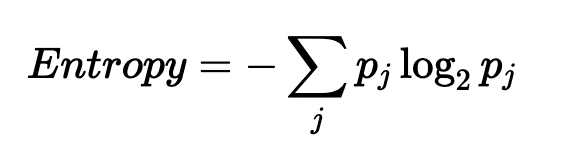

Task:
- Compute the entropy of survived class in titanic data

In [19]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
# calculate entropy using pandas and math package
from math import log, e

In [21]:
# Credits: https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python

def entropy(labels, base=None):

    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    base = e if base is None else base
    for i in probs:
        ent -= i * log(i, base)

    return ent

print('Entropy :', entropy(titanic['survived'], base=None))

Entropy : 0.6659119735267652


In [22]:
# Another way to calculate entropy using pandas and math

def entropy(labels, base=None):
    vc = pd.Series(labels).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

print('Entropy :', entropy(titanic['survived'], base=None))

Entropy : 0.6659119735267652
